In [30]:
function concentration(Vl,Vb,steps)
    
    #initialize
    step = 1;σ_x = 0;σ_y = 1;σ_x_list = [0.];σ_y_list =[1.];step_list = [0.]

    #simulation
    while step<steps
        ΔV = abs(rand(truncated(Normal(1.5,0.2),lower = 0.5, upper = 2.5)))
        f1 = ΔV/(ΔV + Vl);f2 = ΔV/(ΔV + Vb);
        a = (1-f1*(1-f2))
        b = f1*(1-f2)
        c = f2*(1-f1)
        d = (1-f2*(1-f1))

        σ_x1 = a*σ_x + b*σ_y
        σ_y1 = c*σ_x + d*σ_y

        ## Be careful! This is a very important debugging step, otherwise \sigma_y is not update correctly!
        σ_x = σ_x1
        σ_y = σ_y1
        
        push!(σ_x_list,σ_x)
        push!(σ_y_list,σ_y)
        push!(step_list,step)
        step += 1
    end
    
    #simulation2
    σ_x_list2 = exhale(σ_x_list[5],Vl,101)

    return σ_x_list,σ_y_list, Vl,σ_x_list2
end

function exhale(σ0,Vl, steps)
    Vb =1e6
    #initialize
    step = 1
    σ_x = σ0
    σ_y = 0
    σ_x_list = [σ0]
    #functions


    #simulation
    while step<steps
        ΔV = rand(truncated(Normal(0.45,0.0),lower = 0.25, upper =0.65))
        f1 = ΔV/(ΔV + Vl);f2 = ΔV/(ΔV + Vb);
        a = (1-f1*(1-f2))
        b = f1*(1-f2)
        c = f2*(1-f1)
        d = (1-f2*(1-f1))

        σ_x1 = a*σ_x + b*σ_y
        σ_y1 = c*σ_x + d*σ_y

        σ_x = σ_x1 ## Be careful! This is a very important debugging step, otherwise \sigma_y is not update correctly!
        σ_y = 0
        push!(σ_x_list,σ_x)
        step += 1
    end

    return σ_x_list
end

function am_lung(n,Vl,Vb,ΔV)
    σ_l = (Vb/(Vb+Vl))*(1-((Vb*Vl+ΔV^2)/((Vb+ΔV)*(Vl+ΔV)))^n)
    return σ_l
end

function am_balloon(n,Vl,Vb,ΔV)
    σ_b = (Vb+Vl*((Vb*Vl+ΔV^2)/((Vb+ΔV)*(Vl+ΔV)))^n)/(Vb+Vl)
    return σ_b
end

am_balloon (generic function with 1 method)

In [31]:
using Random, Distributions
d1 = truncated(Normal(6.5,1.25),lower = 5,upper = 8)
d2 = truncated(Normal(6.83,0.71), lower = 4, upper =8)

Vl = abs.(rand(d1,100000))
# DeltaV = abs.(rand(d2,1000))
s1= concentration.(Vl,(8/44)*22.4,25);
s2= concentration.(Vl,2*(8/44)*22.4,25);


In [32]:
meanlist1 = [mean([s1[k][4][j]*1e6 for k in 1:1:100000]) for j in 1:5:100]
meanlist2 =  [mean([s2[k][4][j]*1e6 for k in 1:1:100000]) for j in 1:5:100]

errlist1 = [std([s1[k][4][j]*1e6 for k in 1:1:100000]) for j in 1:5:100]
errlist2 =  [std([s2[k][4][j]*1e6 for k in 1:1:100000]) for j in 1:5:100]

20-element Vector{Float64}:
 34335.231206760465
 13517.226363192578
  5407.018708100899
  7320.732500007334
  9036.712261793089
  9298.348664029538
  8692.566618928478
  7681.14706408995
  6544.46399004651
  5436.987206216635
  4434.771667348007
  3567.6063386757683
  2839.422207063707
  2240.793794872304
  1756.3513351829845
  1369.0012163409388
  1062.1889332845085
   820.9910303134664
   632.5289537066733
   486.0085120398436

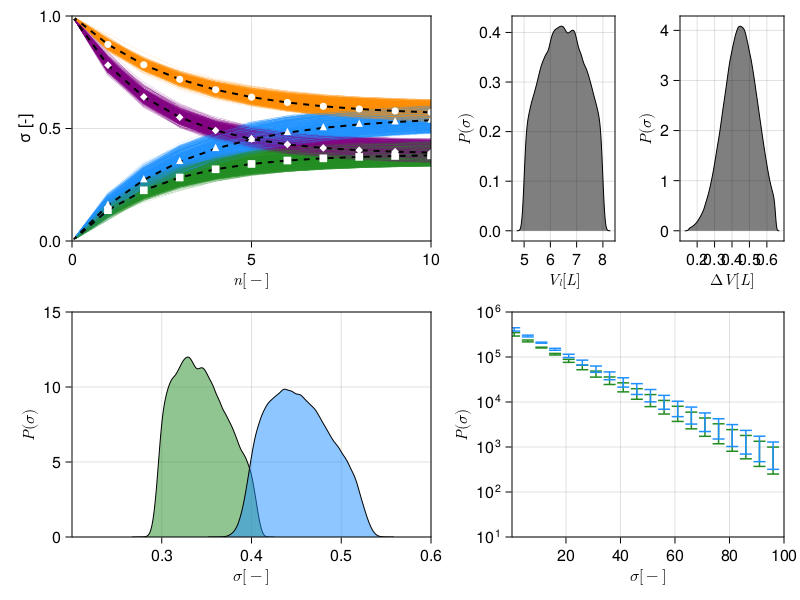

In [33]:
using CairoMakie

fig = Figure(size = (100, 300))
ax = Axis(fig[1, 1:3], xlabel = L"n [-]", ylabel = "σ [-]",
limits = (0,10,0,1)
)

for k in 1:1:1000
    lines!(0:1:24,s1[k][1], color = :forestgreen, linewidth = .1, zorder =2)
    lines!(0:1:24,s1[k][2],linewidth = .1, color = :purple, zorder =2)

    lines!(0:1:24,s2[k][1], color = :dodgerblue, linewidth = .1, zorder =2)
    lines!(0:1:24,s2[k][2],linewidth = .1, color = :darkorange, zorder =2)
end
scatterlines!(0:1:24,am_lung.(0:1:24,6.5,(8/44)*22.4,1.5), linewidth = 2,color = :black,linestyle = :dash,marker = '■',markercolor = :white,markersize=10)
scatterlines!(0:1:24,am_balloon.(0:1:24,6.5,(8/44)*22.4,1.5), linewidth = 2,color = :black,linestyle = :dash, marker= '◆',markercolor = :white,markersize=10)
scatterlines!(0:1:24,am_lung.(0:1:24,6.5,2*(8/44)*22.4,1.5), linewidth = 2,color = :black,linestyle = :dash,marker = :utriangle,markercolor = :white,markersize=10)
scatterlines!(0:1:24,am_balloon.(0:1:24,6.5,2*(8/44)*22.4,1.5), linewidth = 2,color = :black,linestyle = :dash,markercolor = :white,markersize=10)


 ax = Axis(fig[2,1:3], ylabel = L"P(σ)", xlabel = L"σ [-]",
limits = (0.2,0.6,0,15))
#  hist!([s1[k][1][5] for k in 1:1:10000], bins = 50,normalization = :pdf)
density!([s1[k][1][6] for k in 1:1:100000], strokewidth = 1, strokecolor = :black,color=(:forestgreen,0.5))

#  hist!([s2[k][1][5] for k in 1:1:10000], bins = 50,normalization = :pdf)
 density!([s2[k][1][6] for k in 1:1:100000], strokewidth = 1, strokecolor = :black, color = (:dodgerblue,0.5))


 ax3 = Axis(fig[1,4], ylabel = L"P(σ)", xlabel = L"V_l [L]",
# limits = (0,1,0,10)
)
density!(Vl, bins = 50, strokewidth = 1, strokecolor = :black, color = (:black,0.5))

ax3 = Axis(fig[1,5], ylabel = L"P(σ)", xlabel = L"ΔV [L]",
# limits = (0,1,0,10)
)
density!(rand(truncated(Normal(0.45,0.1),lower = 0.15, upper =0.65),1000000), strokewidth = 1, strokecolor = :black, color = (:black,0.5))

# ax = Axis(fig[1, 4:5], xlabel = L"n [-]", ylabel = "σ [-]",
# limits = (0,300,1e0,1e6),
# yscale = log10
# )
# for k in 1:1:1000
#     lines!((0:1:499 ),s1[k][4]*1e6, color = :forestgreen, linewidth = .05, zorder =2) 
#     lines!((0:1:499 ),s2[k][4]*1e6, color = :dodgerblue, linewidth = .05, zorder =2)
# end

ax = Axis(fig[2,4:5], ylabel = L"P(σ)", xlabel = L"σ [-]",
limits = (0.2,100,1e1,1e6),
yscale=log10
)

errorbars!(1:5:100, meanlist1, errlist1 ; whiskerwidth = 12, color = :forestgreen)
errorbars!(1:5:100, meanlist2, errlist2 ; whiskerwidth = 12, color = :dodgerblue)

fig